In [1]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

### Import the data for T. Brucei

In [2]:
#visualise t. brucei
tbb_table = pd.read_table('tbb.txt')
tbb_table.head()

control = tbb_table[tbb_table['g']=='control']
melarsoprol = tbb_table[tbb_table['g']=='melarsoprol']
compound25 = tbb_table[tbb_table['g']=='compound25']

### Create a Kaplan Meier survaival plot

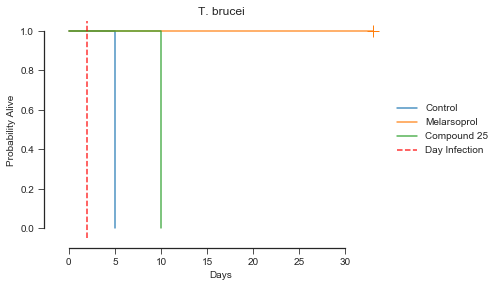

In [13]:
#the actual plot
fig,ax = plt.subplots()
kmf = KaplanMeierFitter()

kmf.fit(control['T'].values,
        control['E'].values,
        label='Control',
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)



kmf.fit(melarsoprol['T'].values,
        melarsoprol['E'].values,
        label='Melarsoprol'
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)

kmf.fit(compound25['T'].values,
        compound25['E'].values,
        label='Compound 25'
       )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)

sns.set_style("ticks")
sns.despine(offset=10, trim=True)
ax.axvline(2,c='r',ls='--',alpha=0.8,label='Day Infection')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Days')
plt.ylabel('Probability Alive')
plt.title("T. brucei")
plt.savefig('tb.svg')
plt.savefig('tb.pdf')
plt.show()
#kmf.event_table

### Stats time

In [51]:
#significance between the control and Melarsoprol
results = logrank_test(control['T'],
                       melarsoprol['T'],
                       control['E'],
                       melarsoprol['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [52]:
#significance between the control and Compound 25
results = logrank_test(control['T'],
                       compound25['T'],
                       control['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [53]:
#sanity check, significance between the Melarsoprol and Compound 25
results = logrank_test(melarsoprol['T'],
                       compound25['T'],
                       melarsoprol['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        1.0000 0.3173
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


### Import the data for T. congolense

In [7]:
#visualise t. congolense
tbb_table = pd.read_table('Tc.txt')
tbb_table.head()

control = tbb_table[tbb_table['g']=='control']
melarsoprol = tbb_table[tbb_table['g']=='melarsoprol']
compound25 = tbb_table[tbb_table['g']=='compound25']

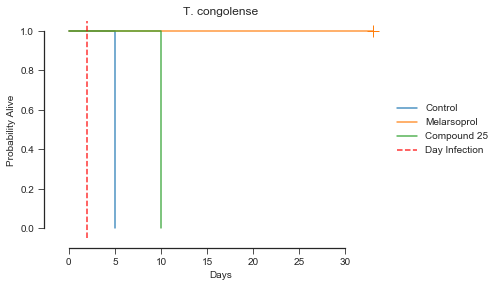

In [12]:
#the actual plot
fig,ax = plt.subplots()
kmf = KaplanMeierFitter()

kmf.fit(control['T'].values,
        control['E'].values,
        label='Control',
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)



kmf.fit(melarsoprol['T'].values,
        melarsoprol['E'].values,
        label='Melarsoprol'
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)

kmf.fit(compound25['T'].values,
        compound25['E'].values,
        label='Compound 25'
       )
kmf.plot(ax=ax,ci_show=False,alpha=0.8,show_censors=True)

sns.set_style("ticks")
sns.despine(offset=10, trim=True)
ax.axvline(2,c='r',ls='--',alpha=0.8,label='Day Infection')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Days')
plt.ylabel('Probability Alive')
plt.title("T. congolense")
plt.savefig('tc.svg')
plt.savefig('tc.pdf')
plt.show()
#kmf.event_table

In [9]:
#significance between the control and Melarsoprol
results = logrank_test(control['T'],
                       melarsoprol['T'],
                       control['E'],
                       melarsoprol['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [10]:
#significance between the control and Compound 25
results = logrank_test(control['T'],
                       compound25['T'],
                       control['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [11]:
#significance between the Melarsoprol and Compound 25
results = logrank_test(melarsoprol['T'],
                       compound25['T'],
                       melarsoprol['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        9.0000 0.0027  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
